## Model Test

In [2]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet50_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Files already downloaded and verified
Before temperature - NLL: 0.353, ECE: 0.046
Optimal temperature: 4.908
After temperature - NLL: 0.829, ECE: 0.424


APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5329 ± 0.0041
Final Average Prediction Set Size: 1.39 ± 0.02
Final Average Coverage: 0.8938 ± 0.0048
Final Average Real Probability: 0.8660 ± 0.0051


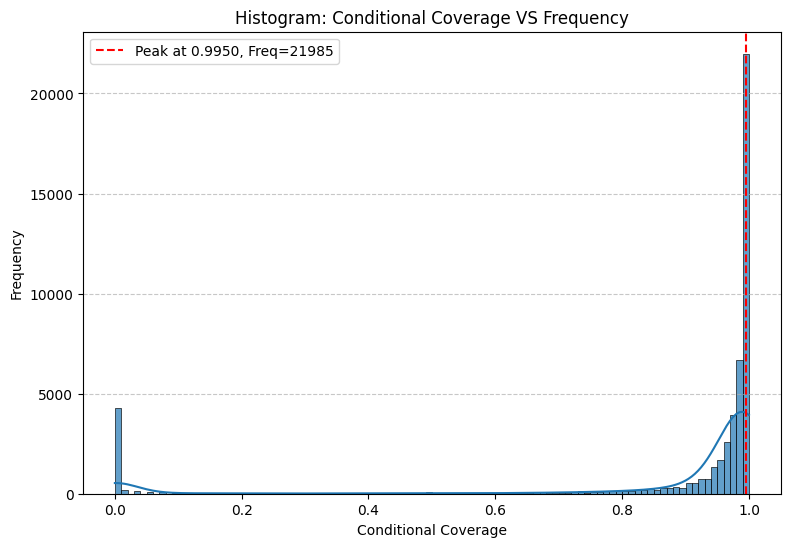

21985 (43.97%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5301 ± 0.0029
Final Average Prediction Set Size: 1.37 ± 0.01
Final Average Coverage: 0.8957 ± 0.0030
Final Average Real Probability: 0.8682 ± 0.0033


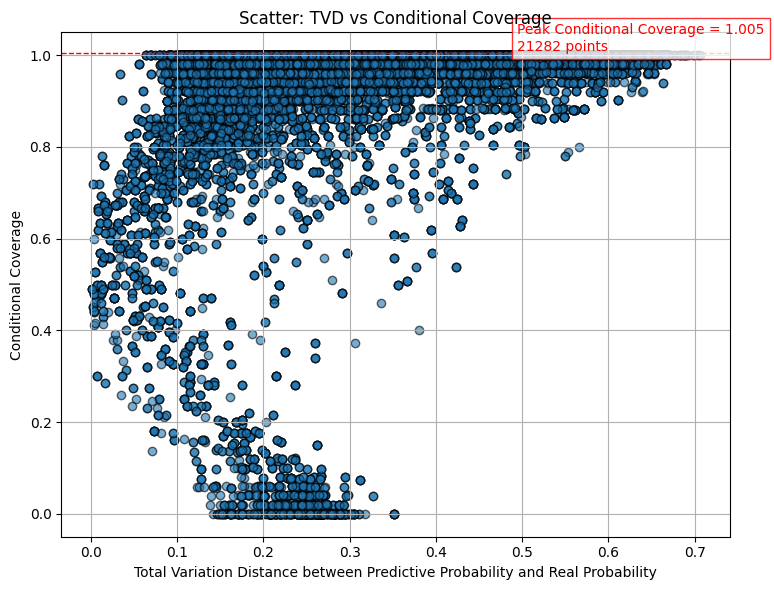

Peak Conditional Coverage = 1.005, with 21282 samples

=== Count Regions Summary ===
39536 (79.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
2208 (4.4%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
2942 (5.9%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.70328']
  Real Probability Set      : ['0.84615']
Sample 2:
  Predictive Probability Set: ['0.65956']
  Real Probability Set      : ['0.84314']
Sample 3:
  Predictive Probability Set: ['0.81912']
  Real Probability Set      : ['1.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.43834', '0.11715']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.11457', '0.11433', '0.10509', '0.10252', '0.09840']
  Real Probability Set      : ['0.00000', '0.02000', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probab

In [3]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5508 ± 0.0036
Final Average Prediction Set Size: 1.11 ± 0.01
Final Average Coverage: 0.8960 ± 0.0043
Final Average Real Probability: 0.8658 ± 0.0045


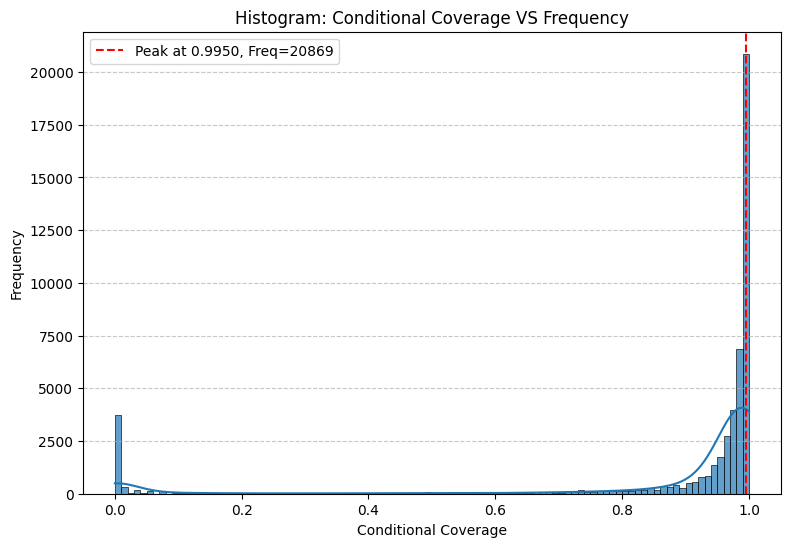

20869 (41.74%) samples reached the peak conditional coverage at 0.9950


In [7]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=1, num_runs=10, alpha=0.1, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5508 ± 0.0036
Final Average Prediction Set Size: 1.11 ± 0.01
Final Average Coverage: 0.8960 ± 0.0043
Final Average Real Probability: 0.8658 ± 0.0045


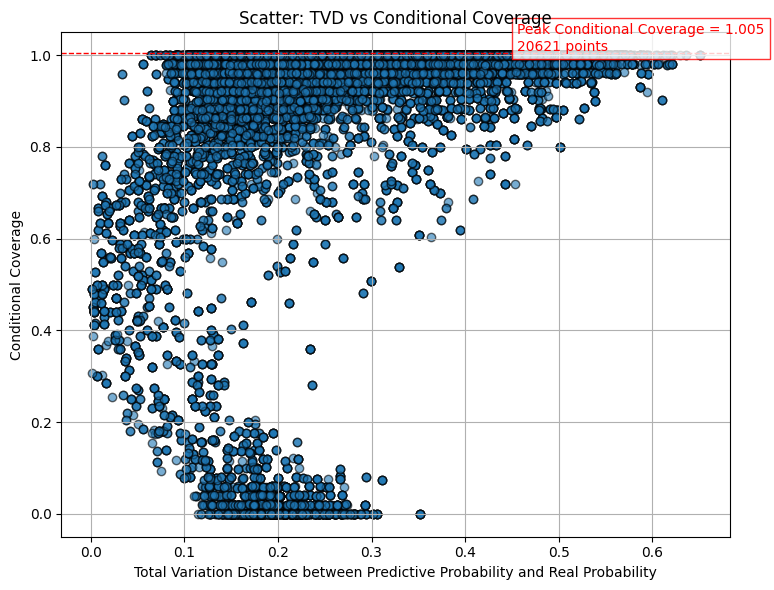

Peak Conditional Coverage = 1.005, with 20621 samples

=== Count Regions Summary ===
41542 (83.1%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
744 (1.5%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
4162 (8.3%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.81604']
  Real Probability Set      : ['1.00000']
Sample 2:
  Predictive Probability Set: ['0.80168']
  Real Probability Set      : ['0.92157']
Sample 3:
  Predictive Probability Set: ['0.72455']
  Real Probability Set      : ['0.90000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.23005', '0.19335']
  Real Probability Set      : ['0.01961', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.50960']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.45779']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TV

In [6]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.1, k_reg=1, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5967 ± 0.0045
Final Average Prediction Set Size: 1.02 ± 0.01
Final Average Coverage: 0.8995 ± 0.0052
Final Average Real Probability: 0.8692 ± 0.0049


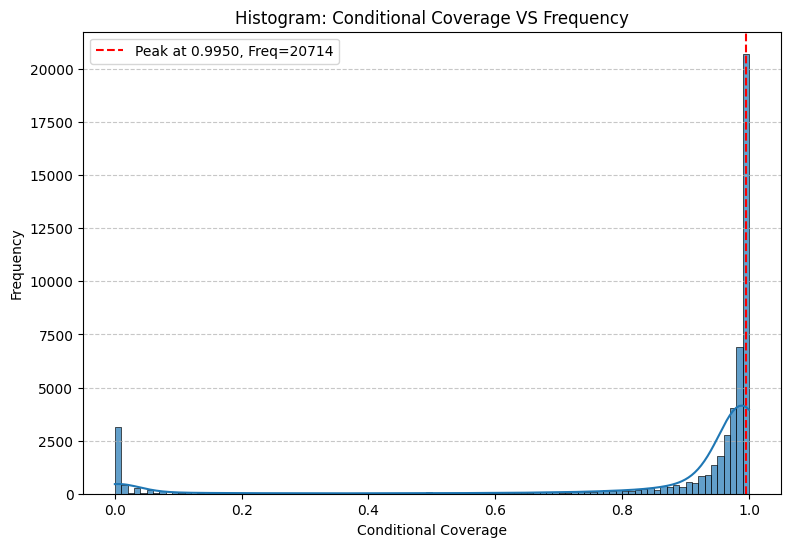

20714 (41.43%) samples reached the peak conditional coverage at 0.9950


In [5]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.0, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5893 ± 0.0046
Final Average Prediction Set Size: 1.01 ± 0.01
Final Average Coverage: 0.8997 ± 0.0064
Final Average Real Probability: 0.8694 ± 0.0060


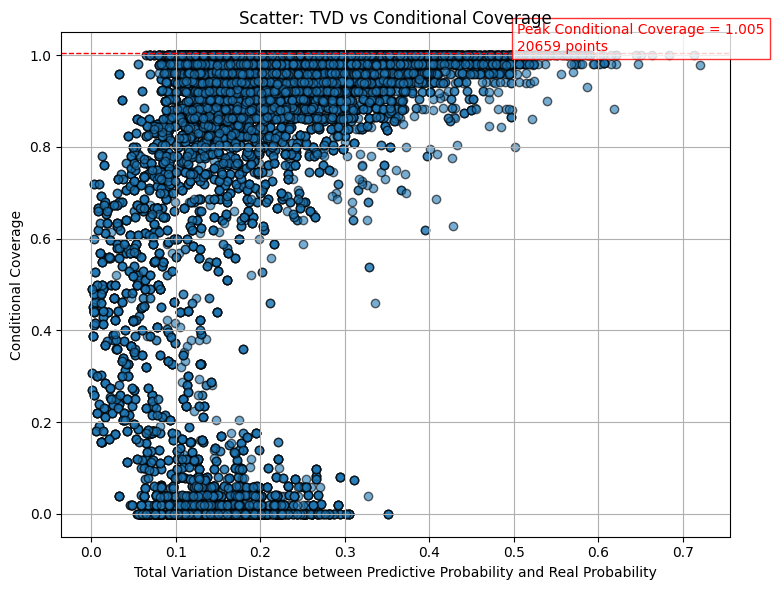

Peak Conditional Coverage = 1.005, with 20659 samples

=== Count Regions Summary ===
42684 (85.4%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
140 (0.3%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
5391 (10.8%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.68460']
  Real Probability Set      : ['0.86275']
Sample 2:
  Predictive Probability Set: ['0.67569']
  Real Probability Set      : ['0.84615']
Sample 3:
  Predictive Probability Set: ['0.78997']
  Real Probability Set      : ['0.98039']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.56607']
  Real Probability Set      : ['0.05769']
Sample 2:
  Predictive Probability Set: ['0.52370']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.60243']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage --

In [8]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.0, num_runs=10, alpha=0.1)